In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from scipy.stats import randint

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [2]:
# Import dataframe

mat = pd.read_csv('student-mat.csv', sep=';')
por = pd.read_csv('student-por.csv', sep=';')
both = pd.merge(mat, por, how='outer', suffixes=['_mat','_por'], on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [3]:
# Encoding dummy variables

math = pd.get_dummies(mat, drop_first=True)
port = pd.get_dummies(por, drop_first=True)

# **Portuguese Dataset**

In [4]:
# Train & Test samples for Portuguese

Xp = port.drop('G3', axis=1)
yp = port['G3']

Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,yp, test_size=0.2, random_state=24)

In [5]:
# Repeated K-Fold cross validator

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=24)

In [6]:
# Linear Regression

linear = LinearRegression()
linear.fit(Xp_train, yp_train)

linear_score = cross_val_score(linear,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ", linear_score)

Cross Validation score:  0.8281572825499036


In [7]:
# Ridge

ridge = Ridge()
ridge.fit(Xp_train,yp_train)

ridge_score = cross_val_score(ridge, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("Cross Validation score: ", ridge_score)

Cross Validation score:  0.8288077855634158


In [8]:
# Lasso

lasso = Lasso()
lasso.fit(Xp_train,yp_train)

lasso_score = cross_val_score(lasso, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("Cross Validation score: ", lasso_score)

Cross Validation score:  0.8316797568325994


In [9]:
# Support Vector Machines based Regression

steps = [('scaler', StandardScaler()), ('SVR',SVR())]
svr_pipeline = Pipeline(steps)
svr_pipeline.fit(Xp_train, yp_train)

svr_score = cross_val_score(svr_pipeline,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ", svr_score)

Cross Validation score:  0.7049884133849651


In [10]:
# Decision Tree Regressor

dtr = DecisionTreeRegressor()
dtr.fit(Xp_train, yp_train)

decision_tree_score = cross_val_score(dtr,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",decision_tree_score)

Cross Validation score:  0.6453772856218603


In [11]:
# Random Forest Regression

rfr = RandomForestRegressor()
rfr.fit(Xp_train, yp_train)

random_forest_score = cross_val_score(rfr,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",random_forest_score)

Cross Validation score:  0.8313209718553346


In [12]:
# Gradient Boosting Regression

gradient = GradientBoostingRegressor()
gradient.fit(Xp_train, yp_train)

gradient_boosting_score = cross_val_score(gradient,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",gradient_boosting_score)

Cross Validation score:  0.8128168855478927


In [13]:
# XGBoost

xgboost = XGBRegressor()
xgboost.fit(Xp_train, yp_train)

xgboost_score = cross_val_score(xgboost,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",xgboost_score)

Cross Validation score:  0.8053402411205154


In [14]:
# Lightgbm

light = LGBMRegressor()
light.fit(Xp_train, yp_train)

lightgbm_score = cross_val_score(light,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",lightgbm_score)

Cross Validation score:  0.8194704082422626


# **Model Evaluation**

In [15]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [16]:
name = ['Linear Regression', 'Ridge', 'Lasso', 'Support Vector Machines', 'Decision Tree',
    'Random Forest','Gradient Boosting', 'XGBoost', 'Lightgbm']

cv_score = [linear_score, ridge_score, lasso_score, svr_score, decision_tree_score, random_forest_score,
    gradient_boosting_score, xgboost_score, lightgbm_score]

cv_score_round = [round(score, 4) for score in cv_score]

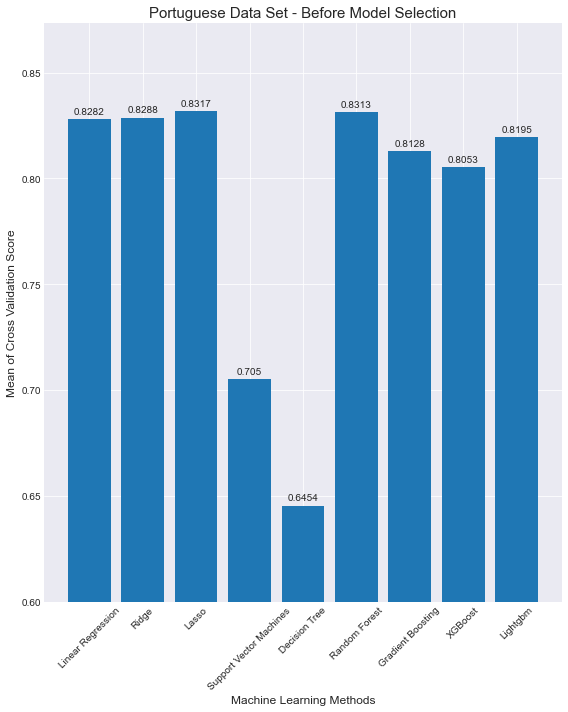

In [17]:
# Cross Validation Score

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(8,10))

score_graph = ax.bar(name, cv_score_round)
autolabel(score_graph)

ax.set_ylim(bottom=0.6)   
ax.set_ylabel("Mean of Cross Validation Score", size=12)
ax.set_xlabel('Machine Learning Methods', size=12)
ax.set_title("Portuguese Data Set - Before Model Selection", size = 15)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation=45)

plt.tight_layout()
plt.savefig("Portuguese Data Set - Before Model Selection.png")
plt.show()